In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
def myQtr(date):
    m = date.month
    if 1<=m and m<=3:
        ndate = datetime.date(date.year-1,12,31)
    elif 4<=m and m<=6:
        ndate = datetime.date(date.year,3,31)
    elif 7<=m and m<=9:
        ndate = datetime.date(date.year,6,30)
    elif 10<=m and m<=12:
        ndate = datetime.date(date.year,9,30)
    return ndate

# sp500

In [3]:
da = pd.read_excel('./xml-data/sas/call-comp_sp500.xlsx', sheet_name='call-comp_sp500')
print(da.shape)

(414543, 18)


## the number of non-missing observations is:

In [4]:
clean = da.dropna()
print(clean.shape)

(30776, 18)


## Time-Series Plot of the Number of Obs.

In [5]:
clean['eventdate'] = pd.to_datetime(clean['xmleventdate'])

In [6]:
clean['qtr']=[myQtr(d) for d in clean['eventdate']]
clean.head()

,xmlid,xmleventtypeid,xmlticker,xmleventdate,xmlfakeqtr,xmlcity,xmlcompanyname,xmlymd,xmlcalldate,datadate,tic,conm,gvkey,cusip,rdq,exchg,fic,no_of_days,eventdate,qtr
15501,708140,1,A,2003-02-21,Q1 2003,SANTA CLARA,Agilent Technologies Inc,20030221,2003-02-21,20030131.0,A,AGILENT TECHNOLOGIES INC,126554.0,00846U101,20030221.0,11.0,USA,0.0,2003-02-21,2002-12-31
15502,1458964,1,A,2007-02-15,Q1 2007,SANTA CLARA,Agilent Technologies Inc,20070215,2007-02-15,20070131.0,A,AGILENT TECHNOLOGIES INC,126554.0,00846U101,20070215.0,11.0,USA,0.0,2007-02-15,2006-12-31
15503,5702951,1,A,2015-05-18,Q2 2015,SANTA CLARA,Agilent Technologies Inc,20150518,2015-05-18,20150430.0,A,AGILENT TECHNOLOGIES INC,126554.0,00846U101,20150518.0,11.0,USA,0.0,2015-05-18,2015-03-31
15504,5716089,31,A,2015-05-28,Agilent,SANTA CLARA,Agilent Technologies Inc,20150528,2015-05-28,20150430.0,A,AGILENT TECHNOLOGIES INC,126554.0,00846U101,20150518.0,11.0,USA,-10.0,2015-05-28,2015-03-31
15505,12278874,1,A,2019-02-20,Q1 2019,SANTA CLARA,Agilent Technologies Inc,20190220,2019-02-20,20190131.0,A,AGILENT TECHNOLOGIES INC,126554.0,00846U101,20190220.0,11.0,USA,0.0,2019-02-20,2018-12-31


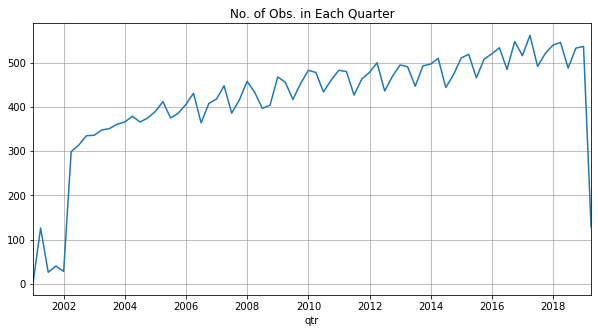

In [7]:
grp_qtr = clean.groupby('qtr').count()['rdq']
plt.figure(figsize=(10,5))
plt.title('No. of Obs. in Each Quarter')
# plt.hlines(500,grp_qtr.index[0],grp_qtr.index[-1])
grp_qtr.plot()
plt.grid(color='grey', linestyle='-', linewidth=.5)

In [8]:
num_sp500 = grp_qtr

## the number of unique firm is:

In [9]:
len(set(clean['xmlticker']))

598

## first day and last day:

In [10]:
(clean['xmlymd'].min(),clean['xmlymd'].max())

(20010110, 20190424)

## distribution across exchanges: 

11 NYSE, 12 AMEX, 14 NASDAQ, 19 OTC

In [11]:
grp_exchg = clean.groupby('exchg')
grp_exchg.count()['xmlid']/sum(grp_exchg.count()['xmlid'])*100

exchg
11.0    77.216012
14.0    22.553288
19.0     0.188459
21.0     0.042241
Name: xmlid, dtype: float64

## distribution across Event Types

**1 earnings call/pre**, 5 corporate call/pre, 7 Conference pre, 11 Shareholders Annual Meeting, 30 Guidance Call/Pre, 31 Corporate Analyst Meeting, 33 Sales/Trading Statement Call/Pre, 34 M&A Announcement

In [12]:
grp_type = clean.groupby('xmleventtypeid')
grp_type.count()['xmlid']/sum(grp_type.count()['xmlid'])*100

xmleventtypeid
1     88.926436
5      1.049519
7      7.164674
8      0.230699
11     0.991032
21     0.003249
22     0.003249
24     0.006499
30     0.022745
31     0.874058
33     0.389914
34     0.337926
Name: xmlid, dtype: float64

# rdq date gap

In [13]:
gap = clean['no_of_days']

Text(0.5, 1.0, 'Date Gap: Rdq - Call (SP500)')

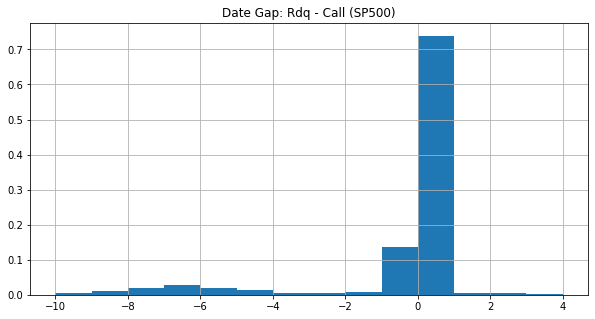

In [14]:
plt.figure(figsize=(10,5))
gap.hist(bins=range(-10,5),density=True,)
plt.title('Date Gap: Rdq - Call (SP500)')

# All firm

In [15]:
da = pd.read_excel('./xml-data/sas/call-comp.xlsx', sheet_name='call-comp')
print(da.shape)

(414747, 18)


## the number of non-missing observations is:

In [16]:
clean = da.dropna()
print(clean.shape)

(150200, 18)


## Time-Series Plot of the Number of Obs.

In [17]:
clean['eventdate'] = pd.to_datetime(clean['xmleventdate'])

In [18]:
clean['qtr']=[myQtr(d) for d in clean['eventdate']]
clean.head()

,xmlid,xmleventtypeid,xmlticker,xmleventdate,xmlfakeqtr,xmlcity,xmlcompanyname,xmlymd,xmlcalldate,gvkey,datadate,tic,cusip,conm,rdq,exchg,fic,no_of_days,eventdate,qtr
15501,5357541,1,A,2014-05-14,Q2 2014,SANTA CLARA,Agilent Technologies Inc,20140514,2014-05-14,126554.0,20140430.0,A,00846U101,AGILENT TECHNOLOGIES INC,20140514.0,11.0,USA,0.0,2014-05-14,2014-03-31
15502,12278874,1,A,2019-02-20,Q1 2019,SANTA CLARA,Agilent Technologies Inc,20190220,2019-02-20,126554.0,20190131.0,A,00846U101,AGILENT TECHNOLOGIES INC,20190220.0,11.0,USA,0.0,2019-02-20,2018-12-31
15503,12282255,7,A,2019-02-28,Agilent,New York,Agilent Technologies Inc,20190228,2019-02-28,126554.0,20190131.0,A,00846U101,AGILENT TECHNOLOGIES INC,20190220.0,11.0,USA,-8.0,2019-02-28,2018-12-31
15504,631275,1,A,2002-05-16,Q2 2002,SANTA CLARA,Agilent Technologies Inc,20020516,2002-05-16,126554.0,20020430.0,A,00846U101,AGILENT TECHNOLOGIES INC,20020516.0,11.0,USA,0.0,2002-05-16,2002-03-31
15505,512907,1,A,2001-05-17,Q2 2001,SANTA CLARA,Agilent Technologies Inc,20010517,2001-05-17,126554.0,20010430.0,A,00846U101,AGILENT TECHNOLOGIES INC,20010517.0,11.0,USA,0.0,2001-05-17,2001-03-31


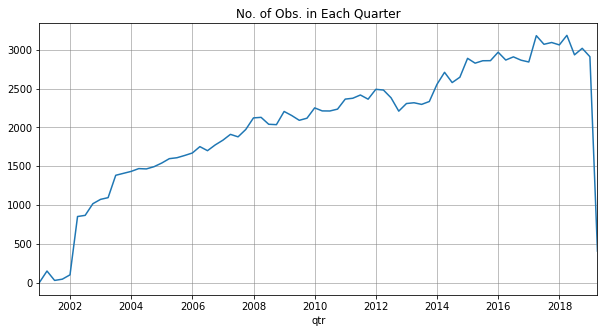

In [19]:
grp_qtr = clean.groupby('qtr').count()['rdq']
plt.figure(figsize=(10,5))
plt.title('No. of Obs. in Each Quarter')
# plt.hlines(500,grp_qtr.index[0],grp_qtr.index[-1])
grp_qtr.plot()
plt.grid(color='grey', linestyle='-', linewidth=.5)

In [20]:
num_allfirm = grp_qtr

## the number of unique firm is:

In [21]:
len(set(clean['xmlticker']))

3773

## first day and last day:

In [22]:
(clean['xmlymd'].min(),clean['xmlymd'].max())

(20010110, 20190424)

## distribution across exchanges: 

11 NYSE, 12 AMEX, 14 NASDAQ, 19 OTC

In [23]:
grp_exchg = clean.groupby('exchg')
grp_exchg.count()['xmlid']/sum(grp_exchg.count()['xmlid'])*100

exchg
11.0    50.914115
12.0     1.193742
14.0    44.420107
17.0     0.058589
19.0     3.365513
20.0     0.017976
21.0     0.029960
Name: xmlid, dtype: float64

## distribution across Event Types

**1 earnings call/pre**, 5 corporate call/pre, 7 Conference pre, 11 Shareholders Annual Meeting, 30 Guidance Call/Pre, 31 Corporate Analyst Meeting, 33 Sales/Trading Statement Call/Pre, 34 M&A Announcement

In [24]:
grp_type = clean.groupby('xmleventtypeid')
grp_type.count()['xmlid']/sum(grp_type.count()['xmlid'])*100

xmleventtypeid
1     93.799601
2      0.007989
5      0.541944
7      4.470706
8      0.055260
11     0.383489
21     0.001997
22     0.000666
24     0.001332
30     0.009321
31     0.392810
33     0.113182
34     0.221704
Name: xmlid, dtype: float64

# rdq date gap

In [25]:
gap = clean['no_of_days']

Text(0.5, 1.0, 'Date Gap: Rdq - Call(All Firm)')

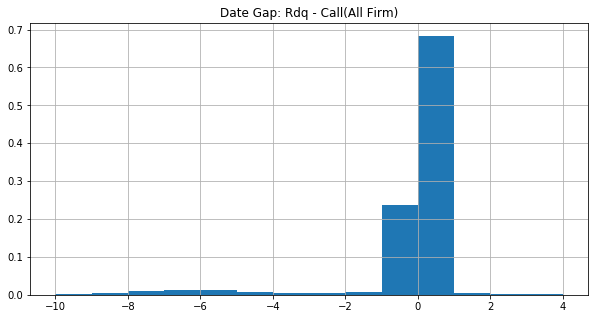

In [26]:
plt.figure(figsize=(10,5))
gap.hist(bins=range(-10,5),density=True,)
plt.title('Date Gap: Rdq - Call(All Firm)')

# ts plot

In [27]:
da['eventdate'] = pd.to_datetime(da['xmleventdate'])
da['qtr']=[myQtr(d) for d in da['eventdate']]
num_raw = da.groupby('qtr').count()['eventdate']

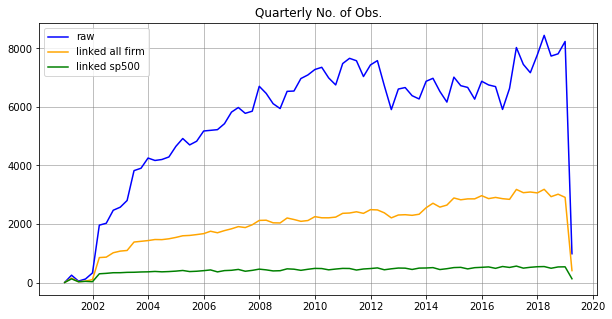

In [28]:
plt.figure(figsize=(10,5))
plt.plot(num_raw, label='raw', color='blue')
plt.plot(num_allfirm, label='linked all firm', color='orange')
plt.plot(num_sp500, label='linked sp500', color='green')
plt.grid(color='grey', linestyle='-', linewidth=.5)
plt.title('Quarterly No. of Obs.')
plt.legend()
plt.show()

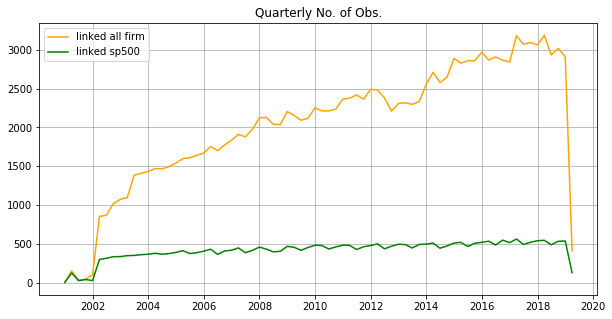

In [29]:
plt.figure(figsize=(10,5))
plt.plot(num_allfirm, label='linked all firm', color='orange')
plt.plot(num_sp500, label='linked sp500', color='green')
plt.grid(color='grey', linestyle='-', linewidth=.5)
plt.title('Quarterly No. of Obs.')
plt.legend()
plt.show()

In [30]:
len(set(da['xmlticker']))

11155